# Titanic_dataset

## Link to the dataset: https://www.kaggle.com/hesh97/titanicdataset-traincsv
### Required libraries:

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
import seaborn as sns
%pylab inline
#Surpress Warnings.
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


## Importing Data and Checking out
### As data is in the CSV file, we will read the CSV using pandas read_csv function and check the first 5 rows of the data frame using head().

In [59]:
titanic=pd.read_csv('Desktop/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Exploration and preparation:
## This will helps us to give tha idea about missing data:
### Learn about data

### Are there missing data?
### Is it categorical? if not, min , max, avg values? if yes, what are the categories?
### distribution of variables
### Duplicate entry

In [20]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handling Missing data

In [21]:
titanic['Age']=titanic['Age'].interpolate()
titanic.Age.isnull().sum()

0

In [23]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [24]:
titanic['Survived'].mean()

0.3838383838383838

In [25]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [26]:
titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

## Data Representation and Transformation

In [27]:
titanic[titanic.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.00,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.00,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.00,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,26.00,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.00,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,38.50,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,47.00,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.50,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.00,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,20.50,0,0,112052,0.0,NaN,S


## Droping some of the columns which many not contribute much to our machine learning model such as Name, Ticket, Cabin etc.

In [28]:
titanic['Pclass']=titanic['Pclass'].astype(str).astype(int)

In [29]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int32  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 80.2+ KB


In [30]:
cols = ['Name','Ticket','Cabin','PassengerId']
titanic_DT= titanic
titanic_DT = titanic_DT.drop(cols,axis=1)
titanic_DT.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Now we convert the Pclass, Sex, Embarked to columns in pandas and drop them after conversion.

In [31]:
dummies = []
cols = ['Pclass','Sex','Embarked']
for col in cols:
 dummies.append(pd.get_dummies(titanic_DT[col]))

In [32]:
titanic_dummies = pd.concat(dummies, axis=1)
titanic_dummies.head()

,1,2,3,female,male,C,Q,S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1


## Then we concatenate to the original dataframe columnwise

In [33]:
titanic_DT = pd.concat((titanic_DT,titanic_dummies),axis=1)

In [34]:
titanic_DT.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,1,2,3,female,male,C,Q,S
0,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1,1,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,0,1,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,1,0,0,1


## Now that we converted Pclass, Sex, Embarked values into columns, we drop the redundant same columns from the dataframe

In [35]:
titanic_DT = titanic_DT.drop(['Pclass','Sex','Embarked'],axis=1)
titanic_DT.head()

,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [36]:
titanic_DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   1         891 non-null    uint8  
 6   2         891 non-null    uint8  
 7   3         891 non-null    uint8  
 8   female    891 non-null    uint8  
 9   male      891 non-null    uint8  
 10  C         891 non-null    uint8  
 11  Q         891 non-null    uint8  
 12  S         891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(8)
memory usage: 41.9 KB


## All is good, except Survived which has few missing values. Pandas has a nice interpolate() function that will replace all the missing NaNs to interpolated values.

In [38]:
titanic_DT['Survived'] = titanic_DT['Survived'].interpolate()

In [39]:
titanic_DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   1         891 non-null    uint8  
 6   2         891 non-null    uint8  
 7   3         891 non-null    uint8  
 8   female    891 non-null    uint8  
 9   male      891 non-null    uint8  
 10  C         891 non-null    uint8  
 11  Q         891 non-null    uint8  
 12  S         891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(8)
memory usage: 41.9 KB


## Now we convert our dataframe from pandas to numpy and we assign input and output

In [40]:
y = titanic_DT['Survived'].values #output

In [41]:
titanic_DT.head()

,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


## X has still Survived values in it, which should not be there. So we drop in numpy column which is the 1st column

In [42]:
titanic_ml= titanic_DT.drop(['Survived'],1)
X = titanic_ml.values
titanic_ml.head()

,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


## Now that we are ready with X and y, lets split the dataset for 70% Training and 30% test set using train_test split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

### Lets start with simple Decision Tree Classifier machine learning algorithm and see how it goes 

In [44]:
clf = tree.DecisionTreeClassifier(max_depth=4)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8208955223880597

## Decision trees compute entropy in the information system. If you peform a decision tree on dataset, the variable importances_ contains important information on what columns of data has large variances thus contributing to the decision. Lets see the output

In [45]:
imp=clf.feature_importances_
names=titanic_ml.columns
imp,names=zip(*(zip(imp,names)))
print(imp,names)

(0.08894211993844295, 0.06558763877285859, 0.035074635198426636, 0.053664399470613, 0.04320222416580014, 0.0, 0.12101811124667002, 0.0, 0.5733715465492225, 0.0, 0.0, 0.01913932465796611) ('Age', 'SibSp', 'Parch', 'Fare', 1, 2, 3, 'female', 'male', 'C', 'Q', 'S')


## Data Visualization and Presentation

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

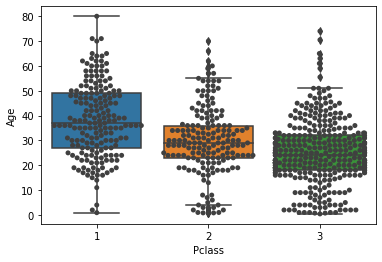

In [60]:
sns.boxplot(x="Pclass", y="Age", data=titanic)
sns.swarmplot(x="Pclass", y="Age", data=titanic, color=".25")

<AxesSubplot:xlabel='Fare', ylabel='Pclass'>

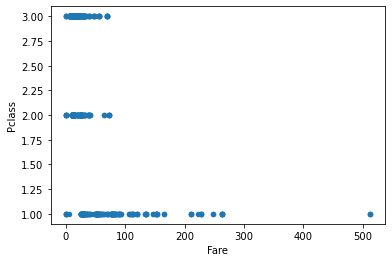

In [47]:
titanic.plot.scatter(x="Fare", y="Pclass")

<AxesSubplot:title={'center':'Female Survivors'}>

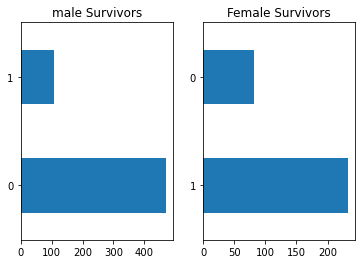

In [48]:
# Womens and mens surviving ratio

fig, axs =plt.subplots(1,2)
titanic[titanic.Sex =='male'].Survived.value_counts().plot(kind='barh',ax=axs[0], title ='male Survivors')
titanic[titanic.Sex =='female'].Survived.value_counts().plot(kind='barh',ax=axs[1], title ='Female Survivors')

<AxesSubplot:title={'center':'Female  child Survivors'}>

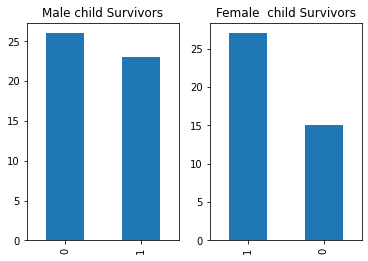

In [49]:
# Male and female survival by their age
fig, axs =plt.subplots(1,2)
titanic[(titanic.Sex =='male') & (titanic.Age < 15)].Survived.value_counts().plot(kind='bar',ax=axs[0], 
                                                                                  title ='Male child Survivors')
titanic[(titanic.Sex =='female') & (titanic.Age < 15)].Survived.value_counts().plot(kind='bar',ax=axs[1], 
                                                                                    title ='Female  child Survivors')

In [50]:
titanic[['Pclass', 'Survived','Sex']].groupby(['Pclass','Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Sex,Survived
0,1,female,0.968085
2,2,female,0.921053
4,3,female,0.500000
1,1,male,0.368852
3,2,male,0.157407
5,3,male,0.135447


In [51]:
titanic['Survived'].mean()

0.3838383838383838

In [52]:
titanic[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [53]:
print(titanic[(titanic.Sex =='male') & (titanic.Age < 10)].Survived.mean(),
titanic[(titanic.Sex =='female') & (titanic.Age < 10)].Survived.mean())

0.5263157894736842 0.6451612903225806


In [54]:
print(titanic[(titanic.Sex =='male') & (titanic.Age < 2)].Survived.mean(),
titanic[(titanic.Sex =='female') & (titanic.Age < 2)].Survived.mean())

0.6923076923076923 1.0


array([[<AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Survived', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Survived', ylabel='Age'>],
       [<AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='Survived', ylabel='Survived'>]], dtype=object)

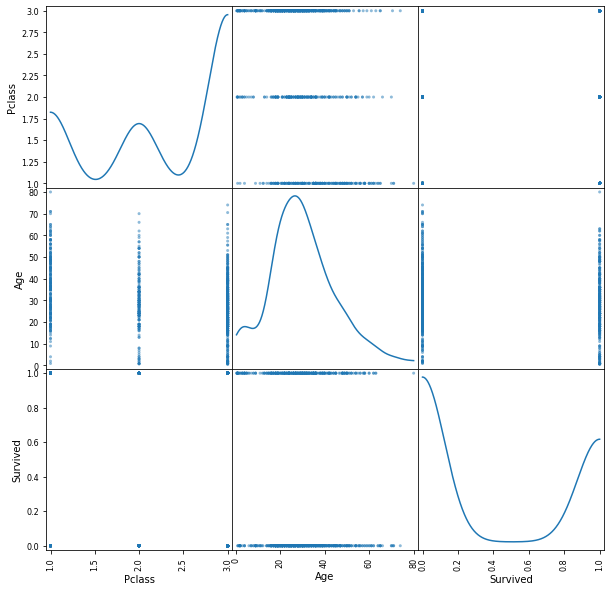

In [55]:
cols=['Pclass','Age','Survived']
pd.plotting.scatter_matrix(titanic[cols], figsize = (10, 10), diagonal = 'kde')

In [62]:
titanic_age= titanic
for dataset in titanic:
    titanic_age['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
print (titanic_age[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000
